# ネットワーク可制御性（最大マッチングに基づく）

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import stats

import matplotlib.pyplot as plt
import pulp
from utils import *

/Users/koga/.pyenv/versions/3.8.9/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


ネットワークの作成


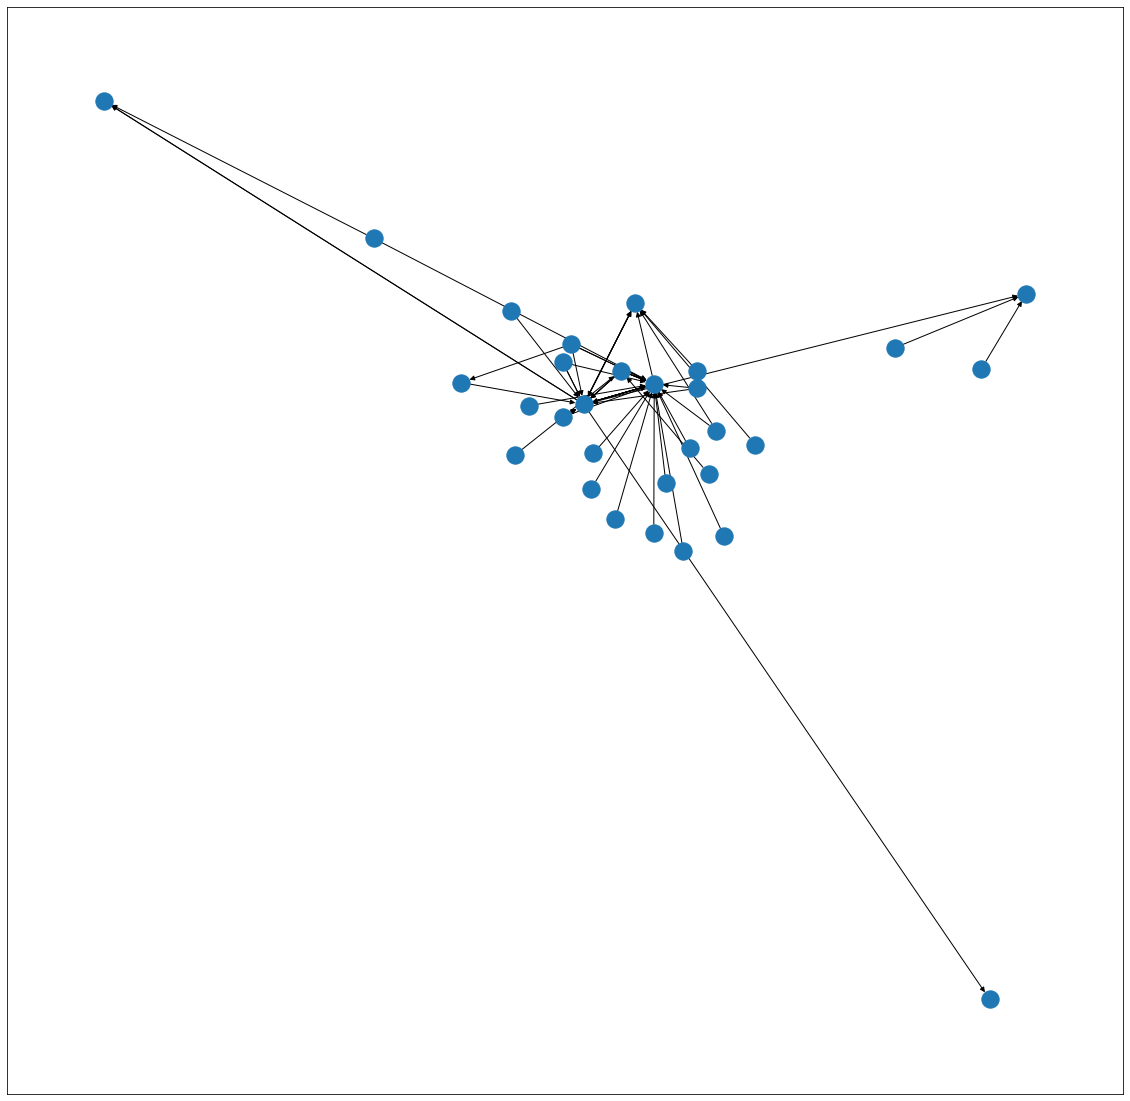

In [2]:
g = nx.scale_free_graph(30)
g.remove_edges_from(nx.selfloop_edges(g))

plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)

nx.draw_networkx(g, with_labels=False, )

In [3]:
mds = get_mds_matching(g)

## 結果にアクセスする

In [4]:
print("drive nodeのサイズ",mds[0])

drive nodeのサイズ 22


In [5]:
mds[1]

{4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}

In [6]:
mds[2]

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True]

In [7]:
node_color = ["red" for _ in range(len(g.nodes()))]
for x in mds[1]:
    node_color[x] = "blue"


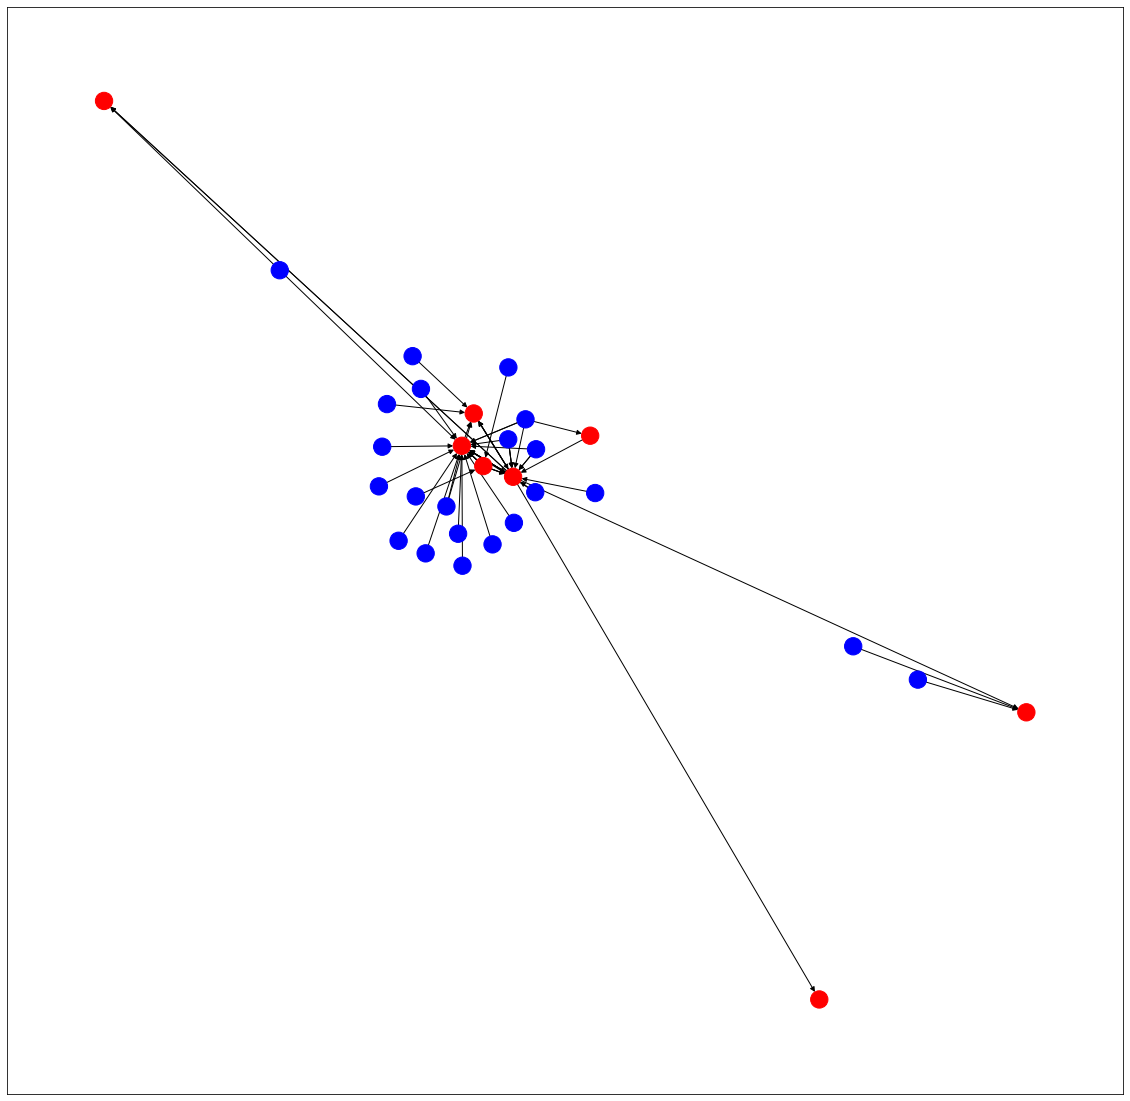

In [8]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw_networkx(g, with_labels=False, node_color=node_color)